In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
train = pd.read_csv (r"C:\Users\Mimi\OneDrive\Documents - Copie\projet kaggle\train.csv")

In [15]:
train.isnull().sum()


Id             0
week           0
region_code    0
region_name    0
TauxGrippe     0
year           0
week_num       0
dtype: int64

In [3]:
print(train.head())
print(train.info())
print(train.describe())

     Id    week  region_code      region_name  TauxGrippe
0  5523  201152           42           ALSACE          66
1  5524  201152           72        AQUITAINE          24
2  5525  201152           83         AUVERGNE          91
3  5526  201152           25  BASSE-NORMANDIE          49
4  5527  201152           26        BOURGOGNE          33
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9196 entries, 0 to 9195
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           9196 non-null   int64 
 1   week         9196 non-null   int64 
 2   region_code  9196 non-null   int64 
 3   region_name  9196 non-null   object
 4   TauxGrippe   9196 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 359.3+ KB
None
                 Id           week  region_code   TauxGrippe
count   9196.000000    9196.000000  9196.000000  9196.000000
mean   10120.500000  200776.148325    51.363636    77.554589
std     2654.800871

In [19]:
train[train['TauxGrippe'] < 0]


,Id,week,region_code,region_name,TauxGrippe,year,week_num


In [20]:
train.groupby('region_name')['TauxGrippe'].describe()


,count,mean,std,min,25%,50%,75%,max
region_name,,,,,,,,
ALSACE,418.0,87.827751,173.999129,0.0,0.0,25.0,93.50,1321.0
AQUITAINE,418.0,65.894737,149.250175,0.0,0.0,10.0,60.75,1444.0
AUVERGNE,418.0,75.923445,172.725920,0.0,0.0,10.5,58.00,1448.0
BASSE-NORMANDIE,418.0,53.322967,134.539907,0.0,0.0,0.0,31.00,1286.0
BOURGOGNE,418.0,59.921053,147.542218,0.0,0.0,7.0,43.50,1169.0
BRETAGNE,418.0,83.779904,156.912795,0.0,5.0,24.5,71.00,1160.0
CENTRE,418.0,62.330144,146.800852,0.0,0.0,2.0,38.50,1145.0
CHAMPAGNE-ARDENNE,418.0,91.021531,198.924487,0.0,0.0,14.5,58.00,1358.0
CORSE,418.0,76.648325,191.691582,0.0,0.0,4.0,40.00,1303.0


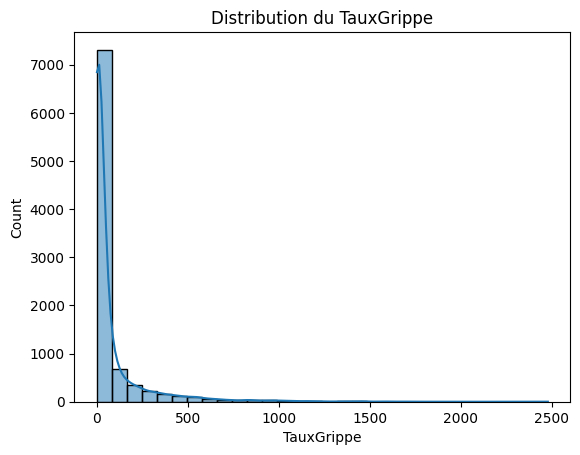

In [18]:
plt.figure()
sns.histplot(train['TauxGrippe'], bins=30, kde=True)
plt.title("Distribution du TauxGrippe")
plt.xlabel("TauxGrippe")
plt.show()

Count = nombre de ligne (semaine de 2004 a 2015 i think)

Pic entre 0 et 500 → la majorité de s lignes ont un faible TauxGrippe.

Baisse ensuite, longue queue à droite → certaines lignes ont des valeurs très élevées, mais elles sont rares.

Distribution très asymétrique → la majorité des semaines/régions ont peu de grippe, mais il existe des épidémies ponctuelles très fortes

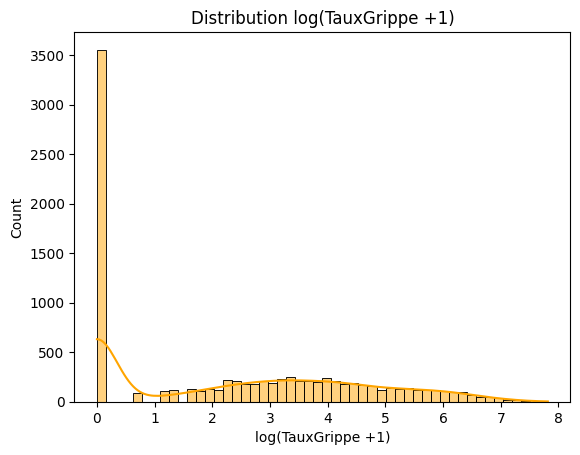

In [7]:
# Log-transform pour mieux voir les gros pics
plt.figure()
sns.histplot(np.log1p(train['TauxGrippe']), bins=50, kde=True, color='orange')
plt.title("Distribution log(TauxGrippe +1)")
plt.xlabel("log(TauxGrippe +1)")
plt.show()


In [8]:
top_outliers = train[train['TauxGrippe'] > train['TauxGrippe'].quantile(0.99)]
print("Top 1% des valeurs :", top_outliers[['region_name','week','TauxGrippe']])

Top 1% des valeurs :              region_name    week  TauxGrippe
1064               CORSE  201104        1303
1068            LIMOUSIN  201104         980
1086               CORSE  201103         949
1115  NORD-PAS-DE-CALAIS  201102        1555
1137  NORD-PAS-DE-CALAIS  201101        1573
...                  ...     ...         ...
7933            LORRAINE  200505         936
7935  NORD-PAS-DE-CALAIS  200505        1656
7936    PAYS-DE-LA-LOIRE  200505        1689
7941         RHONE-ALPES  200505        1855
7963         RHONE-ALPES  200504         955

[92 rows x 3 columns]


In [11]:
train['week'] = train['week'].astype(str)   # convertir la colonne en texte
train['year'] = train['week'].str[:4].astype(int)       # 4 premiers caractères = année
train['week_num'] = train['week'].str[4:].astype(int)  # reste = numéro de semaine pour avoir la semaine 


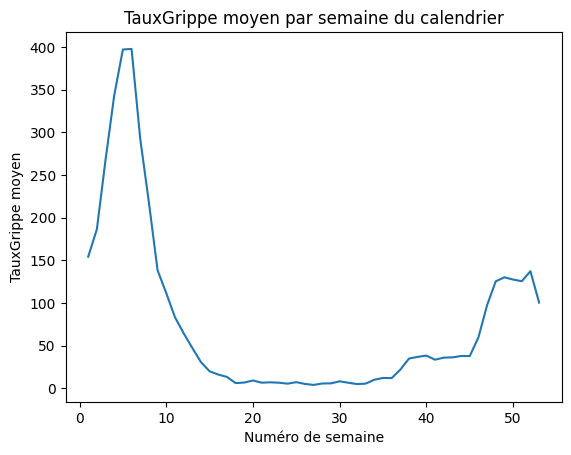

In [12]:

# on fait  la moyenne par semaine du calendrier (saisonnalité)
weekly_mean = train.groupby('week_num')['TauxGrippe'].mean()
plt.figure()
weekly_mean.plot()
plt.title("TauxGrippe moyen par semaine du calendrier")
plt.xlabel("Numéro de semaine")
plt.ylabel("TauxGrippe moyen")
plt.show()

Les pics saisonniers apparaissent aux extrémités de l’année (48 semaine par an 4*12)

Le milieu de l’année (printemps/été) → très peu de grippe →creux ==>  valeurs proches de 0

Ces patterns sont très utiles pour ton modèle : ça montre la saisonnalité

In [24]:
region_stats = train.groupby('region_name')['TauxGrippe'].agg(['mean','median']).sort_values(by='mean', ascending=False)
print(region_stats)


                                  mean  median
region_name                                   
LIMOUSIN                    152.055024    40.0
RHONE-ALPES                 136.337321    43.0
NORD-PAS-DE-CALAIS          113.681818     0.0
LANGUEDOC-ROUSSILLON         97.255981    16.0
CHAMPAGNE-ARDENNE            91.021531    14.5
ALSACE                       87.827751    25.0
BRETAGNE                     83.779904    24.5
PROVENCE-ALPES-COTE-D-AZUR   79.021531    14.0
CORSE                        76.648325     4.0
AUVERGNE                     75.923445    10.5
LORRAINE                     70.322967    11.0
AQUITAINE                    65.894737    10.0
ILE-DE-FRANCE                63.598086    15.0
CENTRE                       62.330144     2.0
POITOU-CHARENTES             61.822967     0.0
MIDI-PYRENEES                60.715311     4.0
BOURGOGNE                    59.921053     7.0
PAYS-DE-LA-LOIRE             57.834928     3.0
HAUTE-NORMANDIE              55.595694     0.0
FRANCHE-COMTE

alors ici jai fixé une année 2010 et jai extrait les semaine (juste pour voir le comportement du taux)
on voit que les pics apparaissent vers la fin (week> 40) donc periode hivernale   ( decembre janvier) et audebut du graphe (0 a 5) donc surement 
le mois de janvier et fevrier et on voit que le taux tend vers  0 hors saison hivernale 


C:\Users\Mimi\AppData\Local\Temp\ipykernel_15968\2482902394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['week_num'] = year_data['week'].astype(str).str[4:].astype(int)


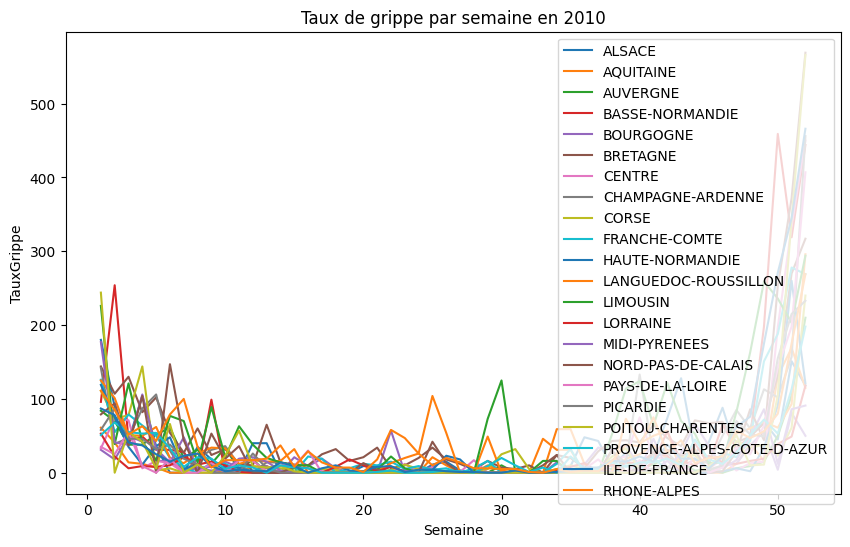

In [23]:
year_data = train[train['week'].astype(str).str[:4] == '2010']
year_data['week_num'] = year_data['week'].astype(str).str[4:].astype(int)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for region in year_data['region_name'].unique():
    subset = year_data[year_data['region_name'] == region]
    plt.plot(subset['week_num'], subset['TauxGrippe'], label=region)
plt.xlabel("Semaine")
plt.ylabel("TauxGrippe")
plt.title("Taux de grippe par semaine en 2010")
plt.legend()
plt.show()


TauxGrippe moyen par région :
 region_name
LIMOUSIN                      152.055024
RHONE-ALPES                   136.337321
NORD-PAS-DE-CALAIS            113.681818
LANGUEDOC-ROUSSILLON           97.255981
CHAMPAGNE-ARDENNE              91.021531
ALSACE                         87.827751
BRETAGNE                       83.779904
PROVENCE-ALPES-COTE-D-AZUR     79.021531
CORSE                          76.648325
AUVERGNE                       75.923445
LORRAINE                       70.322967
AQUITAINE                      65.894737
ILE-DE-FRANCE                  63.598086
CENTRE                         62.330144
POITOU-CHARENTES               61.822967
MIDI-PYRENEES                  60.715311
BOURGOGNE                      59.921053
PAYS-DE-LA-LOIRE               57.834928
HAUTE-NORMANDIE                55.595694
FRANCHE-COMTE                  54.653110
BASSE-NORMANDIE                53.322967
PICARDIE                       46.636364
Name: TauxGrippe, dtype: float64


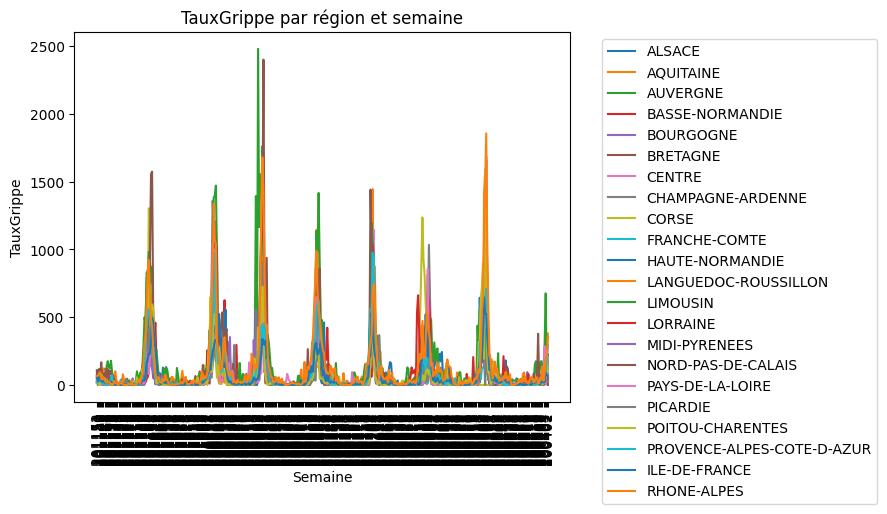

In [13]:
#  Moyenne et tendances par région
region_mean = train.groupby('region_name')['TauxGrippe'].mean().sort_values(ascending=False)
print("TauxGrippe moyen par région :\n", region_mean)

plt.figure()
for region in train['region_name'].unique():
    subset = train[train['region_name'] == region]
    plt.plot(subset['week'], subset['TauxGrippe'], label=region)
plt.xticks(rotation=90)
plt.title("TauxGrippe par région et semaine")
plt.xlabel("Semaine")
plt.ylabel("TauxGrippe")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

Ici cest la moyenne de tout le dataset, ne pas confondre avec les pics (histoire de voir quelle region chope le plus la grippe) 
LIMOUSIN et RHONE-ALPES sont des régions plus montagneuses ou froides → la grippe se propage plus facilement en hiver

PICARDIE, Basse-Normandie, etc ont moins de densité de population 

jai regroupe toutes les lignes qui ont le même numéro de semaine, peu importe l’année ou la région

.mean() → calcule la moyenne du TauxGrippe pour cette semaine

moyenne du taux de grippe par semaine (pic debut et fin ) ==> automne + hiver 
On prend toutes les lignes du dataset, donc toutes les régions et toutes les années

On regroupe par numéro de semaine dans l’année (1, 2, 3 ......52)

Pour chaque semaine, on fait la moyenne du TauxGrippe de toutes ces lignes 
ne dit rien sur les regions mais nous montre la saisonnalité et les pics de taux 

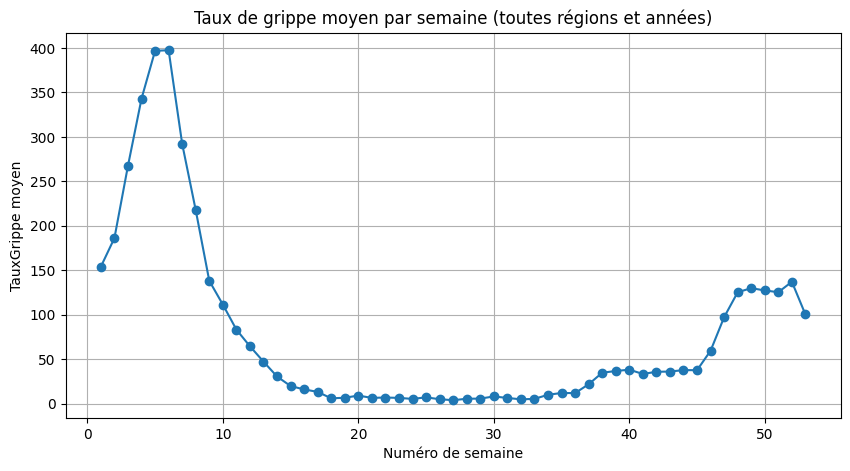

In [26]:
weekly_mean = train.groupby('week_num')['TauxGrippe'].mean()
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(weekly_mean.index, weekly_mean.values, marker='o')
plt.xlabel("Numéro de semaine")
plt.ylabel("TauxGrippe moyen")
plt.title("Taux de grippe moyen par semaine (toutes régions et années)")
plt.grid(True)
plt.show()
